# Лабороторная работа 3. Методы классификации данных

## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
wine=pd.read_csv('wine.data.csv', header = None)
wine.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.
Алкоголь, Яблочная кислота, Зола, Щелочность золы, Магний, Общее количество фенолов, Флаваноиды, Нефлаваноидные фенолы, Проантоцианы, Интенсивность цвета, Оттенок, OD280/OD315 разбавленных вин, Пролин

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [3]:
wine.drop_duplicates()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

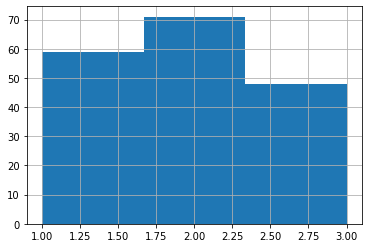

In [4]:
wine.Label.hist(bins = 3)

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [5]:
d = preprocessing.normalize(wine, axis=0)
wine_scaled = pd.DataFrame(d, columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wine_scaled

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.035921,0.081882,0.049518,0.076455,0.059122,0.094479,0.088238,0.101461,0.054861,0.101553,0.076013,0.079202,0.108582,0.098523
1,0.035921,0.075956,0.051545,0.067330,0.042446,0.074393,0.083511,0.091514,0.050943,0.056763,0.059032,0.079964,0.094178,0.097135
2,0.035921,0.075725,0.068341,0.084006,0.070491,0.075137,0.088238,0.107429,0.058780,0.124613,0.076552,0.078441,0.087807,0.109624
3,0.035921,0.082688,0.056468,0.078657,0.063670,0.084064,0.121327,0.115719,0.047024,0.096675,0.105125,0.065494,0.095563,0.136914
4,0.035921,0.076186,0.075001,0.090298,0.079587,0.087783,0.088238,0.089193,0.076414,0.080710,0.058223,0.079202,0.081159,0.067994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.107763,0.078890,0.163612,0.077084,0.077692,0.070673,0.052943,0.020226,0.101885,0.047007,0.103777,0.048740,0.048197,0.068457
174,0.107763,0.077106,0.113226,0.078028,0.087167,0.075881,0.056724,0.024868,0.084251,0.062528,0.098386,0.053309,0.043211,0.069382
175,0.107763,0.076358,0.123940,0.071106,0.075797,0.089271,0.050106,0.022878,0.084251,0.059867,0.137471,0.044932,0.043211,0.077245
176,0.107763,0.075783,0.075001,0.074567,0.075797,0.089271,0.051997,0.022547,0.103845,0.064745,0.125341,0.045694,0.044873,0.077708


<AxesSubplot:>

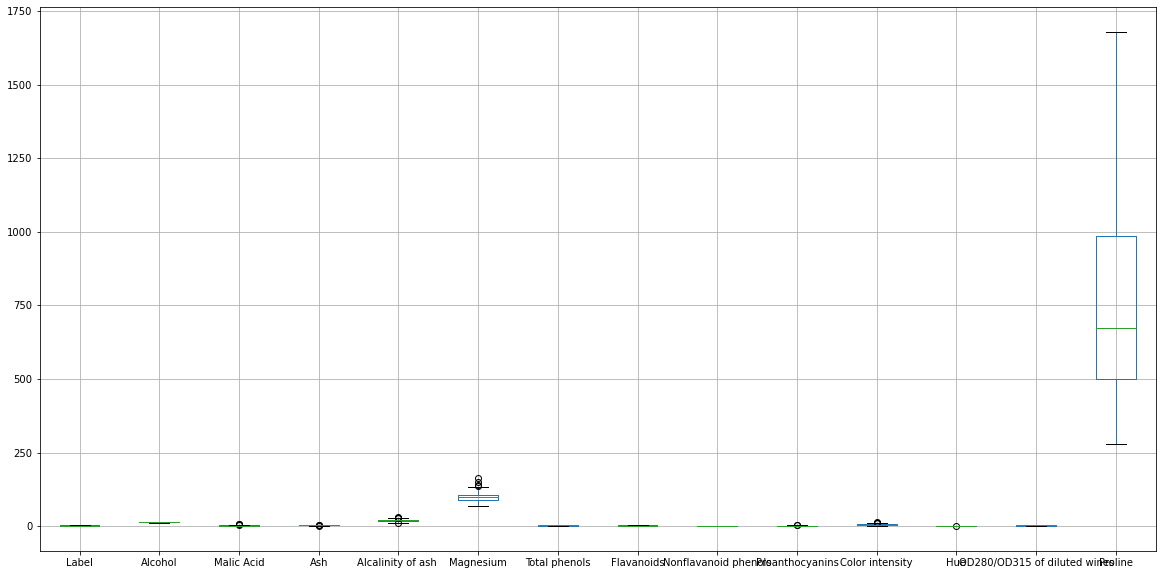

In [6]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
wine.boxplot()

<AxesSubplot:>

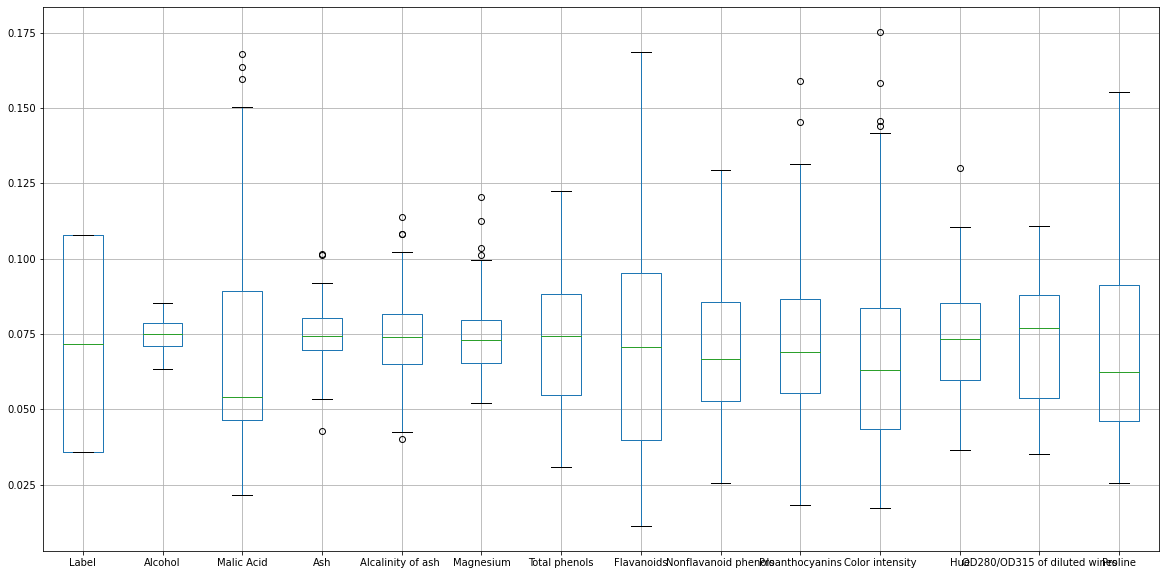

In [7]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
wine_scaled.boxplot()

### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

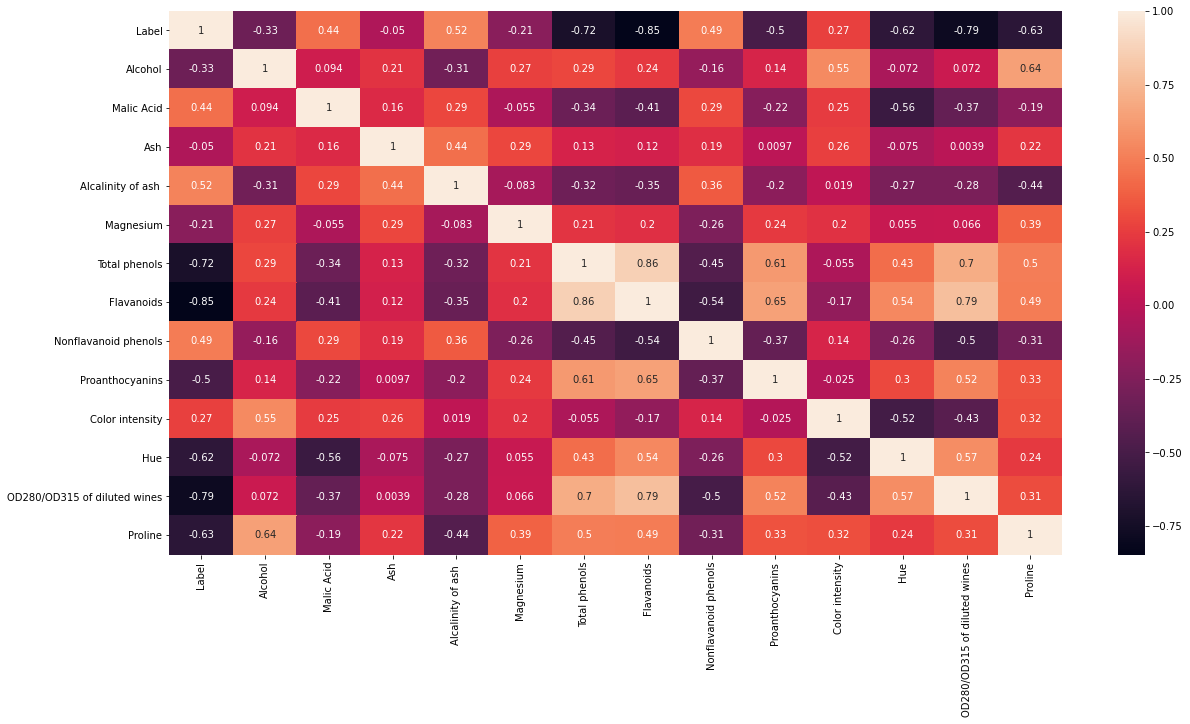

In [8]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(), annot=True)

### 7.	Заполните пропущенные значения в данных;

In [9]:
wine.count().isna()

Label                           False
Alcohol                         False
Malic Acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import RadiusNeighborsClassifier


things = wine.values #Задаем класс, преобразовываем и ДФ в НП
Y = things[:, 0] #Нарезаем данные, первый столбец
X = things[:, 1:13] #Тоже самое, но со 2го по 14й

#train_test_split разделяет все данные на Х признаков и Y меток
#Поскольку мы используем перекрестную проверку, нам не нужно делить наши данные на обучающие и тестовые наборы. 
#Нам нужны все данные в обучающем наборе, чтобы мы могли применить к ним перекрестную проверку.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
#Масштабируем данные
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#Запускаем деревце
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 8, random_state = 1)
tree.fit(X_train, Y_train)
y_pred = tree.predict(X_test)

#Кросс валидация
all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=5)
print("Бинарное дерево решения")
print("Точность для cv=5: ",all_accuracies)
print("Среднее значение точности: ",all_accuracies.mean())
print("Значение точности: " + str(accuracy_score(Y_test, y_pred)))
print("\nМатрица ошибок: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nОтчет о классификации: \n" + str(classification_report(Y_test, y_pred)))
#Оценка модели
dtc_p={'max_depth': range(1,11), 'max_features': range(2,13), 'criterion': ['gini','entropy'],'random_state': range(0,10)}
tree_grid = GridSearchCV(tree, dtc_p, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, Y_train)
print("Лучший набор и лучшая точность: ")
print(tree_grid.best_params_)
print(tree_grid.best_score_)

#Запускаем соседей по расстоянию
print("Метод ближайших соседей")
rnc = RadiusNeighborsClassifier(radius=10, weights='distance', metric='minkowski',algorithm='auto')
rnc.fit(X_train, Y_train)
rnc_pred = rnc.predict(X_test)
#Кросс валидация
all_accuracies = cross_val_score(estimator=rnc, X=X_train, y=Y_train, cv=5)
print("Точность для cv=5: ",all_accuracies)
print("Среднее значение точности: ",all_accuracies.mean())
print("Значение точности: " + str(accuracy_score(Y_test, rnc_pred)))
print("\nМатрица ошибок: \n" + str(confusion_matrix(Y_test, rnc_pred)))
print("\nОтчет о классифицации: \n" + str(classification_report(Y_test, rnc_pred)))
#Оценка модели
rnc_pipe = Pipeline([('scaler', StandardScaler()), ('rnc', RadiusNeighborsClassifier(n_jobs=-1))])
rnc_params = {'rnc__radius': range(11, 20), 'rnc__metric': ['minkowski','manhattan','euclidean','chebyshev']}
rnc_grid = GridSearchCV(rnc_pipe, rnc_params, cv=5, n_jobs=-1, verbose=True)
rnc_grid.fit(X_train, Y_train)
#
print("Лучший набор и лучшая точность: ")
print(rnc_grid.best_params_)
print(rnc_grid.best_score_)



Бинарное дерево решения
Точность для cv=5:  [0.96551724 1.         0.96428571 1.         0.89285714]
Среднее значение точности:  0.9645320197044336
Значение точности: 0.9166666666666666

Матрица ошибок: 
[[14  0  0]
 [ 1 12  0]
 [ 0  2  7]]

Отчет о классификации: 
              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.86      0.92      0.89        13
         3.0       1.00      0.78      0.88         9

    accuracy                           0.92        36
   macro avg       0.93      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits
Лучший набор и лучшая точность: 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'random_state': 9}
0.9719211822660098
Метод ближайших соседей
Точность для cv=5:  [0.96551724 1.         0.85714286 0.85714286 0.82142857]
Среднее значение точности:  0.9002463054187192
Значение

C:\Users\User\Desktop\Новая папка (2)\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.40837438 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438
 0.40837438 0.40837438 0.40837438        nan 0.91477833 0.87906404
 0.87216749 0.82980296 0.69679803 0.61231527 0.53546798 0.45073892
 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438
 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438
 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438 0.40837438]
  warnings.warn(


### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

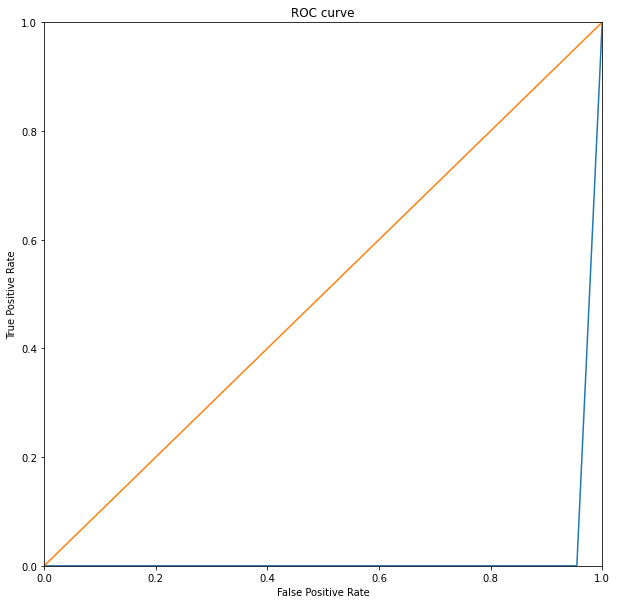

In [11]:
from sklearn.metrics import precision_recall_curve, classification_report
from matplotlib.pylab import rc, plot
import sklearn.metrics as metrics

plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

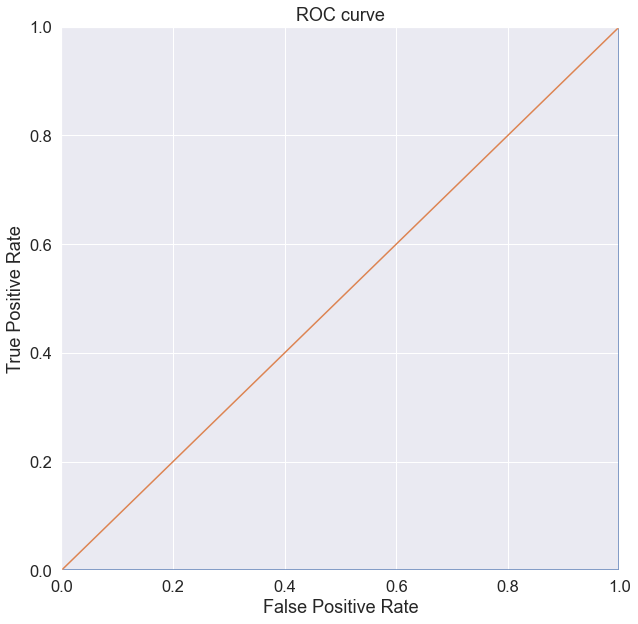

In [13]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, rnc_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
metrics.roc_auc_score(Y_test, tree.predict_proba(X_test), multi_class='ovr')

0.9280739389435042

In [15]:
metrics.roc_auc_score(Y_test, rnc.predict_proba(X_test), multi_class='ovr')

1.0

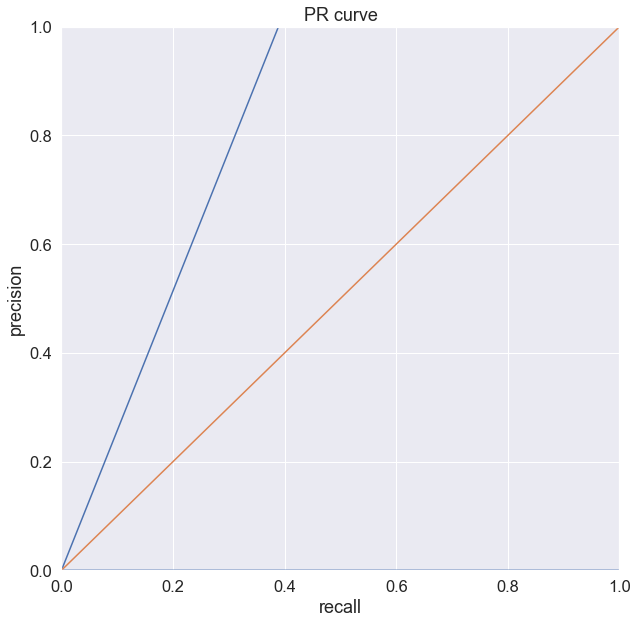

In [16]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.precision_recall_curve(Y_test, tree.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='PR curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.show()

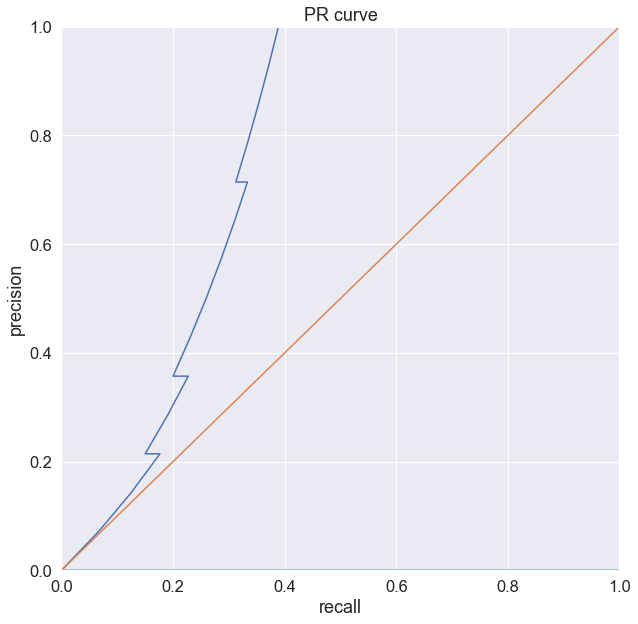

In [17]:
plt.figure(figsize=(10, 10))
fpr, tpr, thresholds = metrics.precision_recall_curve(Y_test, rnc.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='PR curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.show()